<a href="https://colab.research.google.com/github/tarutear/2025-1/blob/main/Energy_expenditure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(dplyr)
library(tidyverse)
library(readxl)
library(httr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.2     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


The Data
Available in df_train.csv and df_test.csv:

Column	Type	Description

---

:
date	chr	Date of the measurement

power_consumption	dbl	Daily power consumption (in kilowatts)

year	int	Year of the measurement

semester	int	Semester of the measurement (1 for Jan-Jun, 2 for Jul-Dec)

quarter	int	Quarter of the measurement (1 for Q1, 2 for Q2, 3 for Q3, 4 for Q4)

day_in_week	chr	Day of the week of the measurement (e.g., Monday, Tuesday)

week_in_year	int	Week number in the year of the measurement

day_in_year	int	Day number in the year of the measurement

month	int	Month of the year of the measurement

---


This dataset was donated to the UCI Machine Learning Repository. For detailed information about the dataset and the preprocessing steps, please refer to the License and Data Preprocessing Details (Invalid URL) notebook

Predict daily **power_consumption** by experimenting with various supervised regression models trained on the training dataset.

1. Evaluate their performance on the test dataset by measuring their Root Mean Squared Error (RMSE).

2. Save the lowest RMSE achieved on the test set as a numeric variable selected_rmse, which should not be greater than 450 kW.

3. Plot the power_consumption predictions and actual daily power_consumption for the test dataset and assess whether the predictions follow a similar trend as the original data.

5. Save your answer "Yes" or "No" as a string variable trend_similarity.

In [2]:
## train data set 불러오기
url <- "https://raw.githubusercontent.com/tarutear/2025-1/c6e34232d454b3e852d4a022186434a99520316f/df_train.xlsx"
destfile <- "df_train.xlsx"

# 파일 다운로드 (바이너리 모드로!)
GET(url, write_disk(destfile, overwrite = TRUE))

# 엑셀 파일 읽기
df_train <- read_excel(destfile)

# 데이터 확인
head(df_train)


Response [https://raw.githubusercontent.com/tarutear/2025-1/c6e34232d454b3e852d4a022186434a99520316f/df_train.xlsx]
  Date: 2025-06-06 07:41
  Status: 200
  Content-Type: application/octet-stream
  Size: 72.4 kB
<ON DISK>  df_train.xlsxNULL

date,power_consumption,year,semester,quarter,day_in_week,week_in_year,day_in_year,month
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
12/16/2006,1209.176,2006,2,4,Sat,50,350,12
12/17/2006,3390.460,2006,2,4,Sun,51,351,12
12/18/2006,2203.826,2006,2,4,Mon,51,352,12
12/19/2006,1666.194,2006,2,4,Tue,51,353,12
12/20/2006,2225.748,2006,2,4,Wed,51,354,12
12/21/2006,1716.624,2006,2,4,Thu,51,355,12


In [3]:
## test data set 불러오기
url <- "https://raw.githubusercontent.com/tarutear/2025-1/c6e34232d454b3e852d4a022186434a99520316f/df_train.xlsx"
destfile <- "df_test.xlsx"

# 파일 다운로드 (바이너리 모드로!)
GET(url, write_disk(destfile, overwrite = TRUE))

# 엑셀 파일 읽기
df_test <- read_excel(destfile)

# 데이터 확인
head(df_test)


Response [https://raw.githubusercontent.com/tarutear/2025-1/c6e34232d454b3e852d4a022186434a99520316f/df_train.xlsx]
  Date: 2025-06-06 07:41
  Status: 200
  Content-Type: application/octet-stream
  Size: 72.4 kB
<ON DISK>  df_test.xlsxNULL

date,power_consumption,year,semester,quarter,day_in_week,week_in_year,day_in_year,month
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
12/16/2006,1209.176,2006,2,4,Sat,50,350,12
12/17/2006,3390.460,2006,2,4,Sun,51,351,12
12/18/2006,2203.826,2006,2,4,Mon,51,352,12
12/19/2006,1666.194,2006,2,4,Tue,51,353,12
12/20/2006,2225.748,2006,2,4,Wed,51,354,12
12/21/2006,1716.624,2006,2,4,Thu,51,355,12


In [ ]:
head(df_train)

date,power_consumption,year,semester,quarter,day_in_week,week_in_year,day_in_year,month
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
12/16/2006,1209.176,2006,2,4,Sat,50,350,12
12/17/2006,3390.460,2006,2,4,Sun,51,351,12
12/18/2006,2203.826,2006,2,4,Mon,51,352,12
12/19/2006,1666.194,2006,2,4,Tue,51,353,12
12/20/2006,2225.748,2006,2,4,Wed,51,354,12
12/21/2006,1716.624,2006,2,4,Thu,51,355,12


In [ ]:
glimpse(df_train)

Rows: 1,202
Columns: 9
$ date              <chr> "12/16/2006", "12/17/2006", "12/18/2006", "12/19/200…
$ power_consumption <dbl> 1209.176, 3390.460, 2203.826, 1666.194, 2225.748, 17…
$ year              <dbl> 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006…
$ semester          <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1…
$ quarter           <dbl> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1…
$ day_in_week       <chr> "Sat", "Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sa…
$ week_in_year      <dbl> 50, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, …
$ day_in_year       <dbl> 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 36…
$ month             <dbl> 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, …


In [5]:
#랜덤포레스트 : 설치시간 1분
install.packages("ranger")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
#xgboost : 설치시간 9분
install.packages("xgboost")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
install.packages("nnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#Solution


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




Rows: 1,202
Columns: 9
$ date              <chr> "12/16/2006", "12/17/2006", "12/18/2006", "12/19/200…
$ power_consumption <dbl> 1209.176, 3390.460, 2203.826, 1666.194, 2225.748, 17…
$ year              <dbl> 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006…
$ semester          <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1…
$ quarter           <dbl> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1…
$ day_in_week       <chr> "Sat", "Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sa…
$ week_in_year      <dbl> 50, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, …
$ day_in_year       <dbl> 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 36…
$ month             <dbl> 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, …


Model,RMSE
<chr>,<dbl>
Linear Regression,603.9999
Random Forest,316.3955
XGBoost,442.9334


selected_rmse: 316.3955 kW
trend_similarity: Yes 


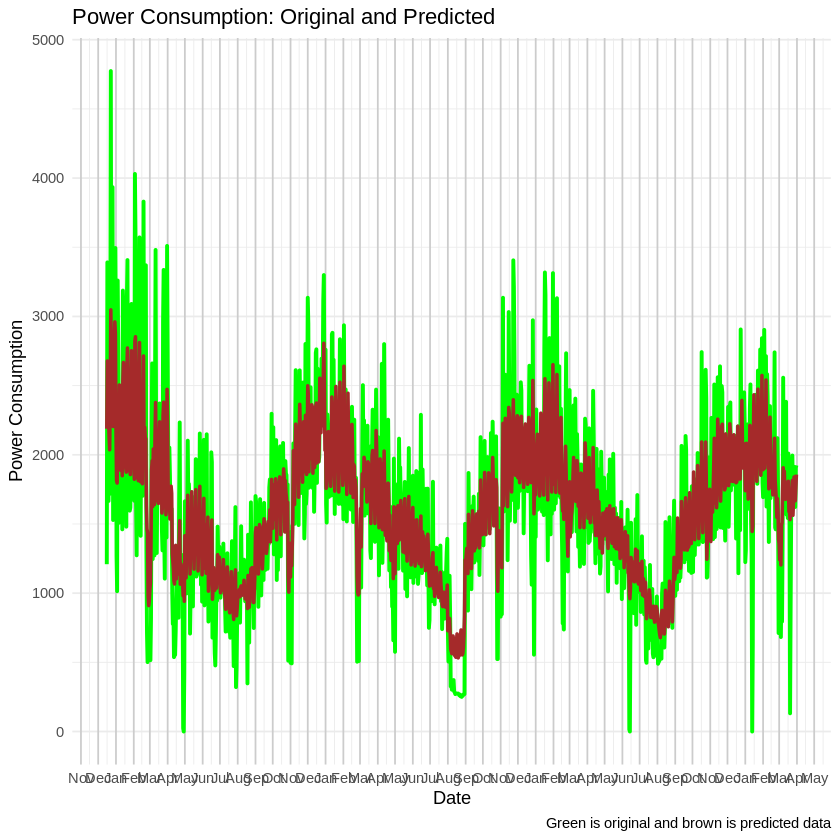

In [8]:
#Solution

# Load necessary libraries
library(dplyr)
library(lubridate)
library(ranger)
library(xgboost)
library(ggplot2)
# Display structure of the training data
glimpse(df_train)

# Convert 'date' column to Date type and 'day_in_week' column to factor in both datasets
df_train <- df_train %>%
  mutate(date = as.Date(date, format = "%m/%d/%Y"),
         day_in_week = factor(day_in_week))
df_test <- df_test %>%
  mutate(date = as.Date(date, format = "%m/%d/%Y"),
         day_in_week = factor(day_in_week))

# Convert categorical variable 'day_in_week' to indicator variables using one-hot encoding in both datasets
df_onehot_train <- model.matrix(~ day_in_week - 1, data = df_train) %>%
  as.data.frame()
df_onehot_test <- model.matrix(~ day_in_week - 1, data = df_test) %>%
  as.data.frame()

# Combine one-hot encoded columns with the original datasets and remove the 'day_in_week' column
df_train <- mutate(df_train, df_onehot_train) %>% select(-c(day_in_week))
df_test <- mutate(df_test, df_onehot_test) %>% select(-c(day_in_week))

# Separate features and target variable for both training and testing datasets
train_x <- df_train %>% select(-power_consumption, -date)
train_y <- df_train[["power_consumption"]]
test_x <- df_test %>% select(-power_consumption, -date)
test_y <- df_test[["power_consumption"]]

# Train models, predict on test dataset and calculate RMSE for each model.
## Linear regression
lm_model <- lm(train_y ~ ., data = train_x)
lm_pred <- predict(lm_model, newdata = test_x)
lm_rmse <- sqrt(mean((test_y - lm_pred)^2))

## Random forest
rf_model <- ranger(power_consumption ~., data = df_train %>% select(-date), num.trees = 1000)
rf_pred <- predict(rf_model, data = df_test %>% select(-date))$predictions
rf_rmse <- sqrt(mean((test_y - rf_pred)^2))

## XGBoost
xgb_model <- xgboost(
  data = as.matrix(train_x),
  label = train_y,
  nrounds = 500,
  objective = "reg:squarederror",
  eta = 0.1,
  max_depth = 1,
  verbose = FALSE
)
xgb_pred <- predict(xgb_model, newdata = as.matrix(test_x))
xgb_rmse <- sqrt(mean((test_y - xgb_pred)^2))

# RMSE scores
data.frame(
  Model = c("Linear Regression", "Random Forest", "XGBoost"),
  RMSE = c(lm_rmse, rf_rmse, xgb_rmse)
)

# Get the lowest RMSE and assign it to selected_rmse
selected_rmse <- min(lm_rmse, rf_rmse, xgb_rmse)
cat("selected_rmse:", selected_rmse, "kW\n")

# Add predictions to the test dataset for plotting
df_test <- df_test %>%
  mutate(Predicted = rf_pred)

# Plot actual vs predicted power consumption over time to check for trend similarity
ggplot(df_test) +
  geom_line(aes(x = date, y = power_consumption), color = "green", linewidth = 1.1) +
  geom_line(aes(x = date, y = Predicted), color = "brown", linewidth = 1) +
  labs(title = "Power Consumption: Original and Predicted", x = "Date", y = "Power Consumption", caption = "Green is original and brown is predicted data") +
  scale_x_date(date_breaks = "1 month", date_labels = "%b") +
  theme_minimal() +
  theme(panel.grid.major.x = element_line(color = "grey80"))

trend_similarity <- "Yes"

cat("trend_similarity:", trend_similarity, "\n")

#의사결정나무

In [9]:
library(rpart)
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
head(df_train)

date,power_consumption,year,semester,quarter,day_in_week,week_in_year,day_in_year,month
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
12/16/2006,1209.176,2006,2,4,Sat,50,350,12
12/17/2006,3390.460,2006,2,4,Sun,51,351,12
12/18/2006,2203.826,2006,2,4,Mon,51,352,12
12/19/2006,1666.194,2006,2,4,Tue,51,353,12
12/20/2006,2225.748,2006,2,4,Wed,51,354,12
12/21/2006,1716.624,2006,2,4,Thu,51,355,12


In [12]:
train_exdate <- df_train %>% select(-date)
test_exdate <- df_test %>% select(-date)

In [11]:
ep_rpart <- rpart(power_consumption ~ ., data = train_exdate)
summary(ep_rpart)

Call:
rpart(formula = power_consumption ~ ., data = train_exdate)
  n= 1202 

          CP nsplit rel error    xerror       xstd
1 0.14075854      0 1.0000000 1.0030127 0.05029013
2 0.04710007      2 0.7184829 0.7256593 0.03832330
3 0.04100518      3 0.6713829 0.6984109 0.03741963
4 0.03116482      4 0.6303777 0.6498940 0.03613463
5 0.01940740      5 0.5992129 0.6222052 0.03521199
6 0.01292027      6 0.5798055 0.6100291 0.03459134
7 0.01252893      9 0.5410446 0.6106677 0.03471440
8 0.01000000     11 0.5159868 0.6037123 0.03404763

Variable importance
   day_in_year   week_in_year          month        quarter           year 
            28             27             24             13              4 
      semester day_in_weekSun day_in_weekSat 
             2              1              1 

Node number 1: 1202 observations,    complexity param=0.1407585
  mean=1592.959, MSE=399720.4 
  left son=2 (986 obs) right son=3 (216 obs)
  Primary splits:
      day_in_year  < 54.5   to the righ

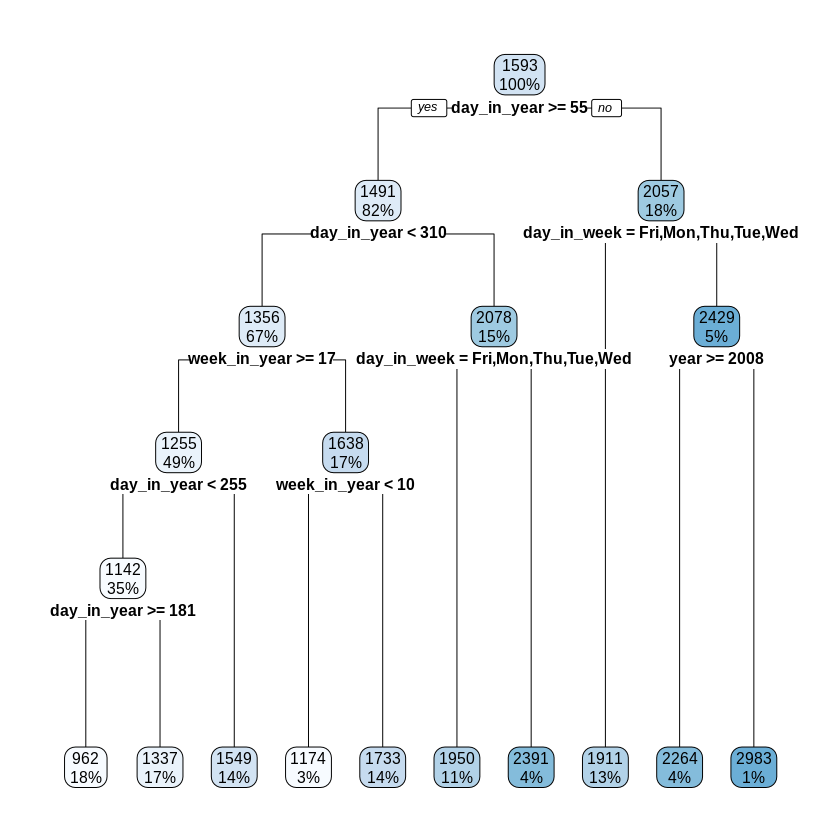

In [ ]:
rpart.plot(ep_rpart)

In [14]:
pred_rpart <- predict(ep_rpart, test_exdate)

In [16]:
rpart_RMSE <- sqrt(mean((test_y - pred_rpart)^2))

## 인공신경망